In [63]:
# importing the MNIST dataset
from sklearn.datasets import fetch_openml
import numpy as np
# Let's take peak at one example from the dataset
# Let's make function that plots the digit
import matplotlib.pyplot as plt
from numpy import random
# fetch_* functions load reaal-life datasets
# load_* fucntons load small toy datasets
# make_* functions make fake datasets
# The generated datasets are returend as (X, y) tuples
# The generated datasets contain input data and targets as NumPy arrays
# Other datasets are returned as sklearn.utils.Bunch objects
# These datasets are dictionaries whose entries can be accessed
# The attirbutes for access are: "DESCR", "data", "target"
# DESCR: returns the description of the dataset
# data: The input data, usually as a 2D NumPy array
# target: The labels, usually as 1D numpy array
mnist = fetch_openml('mnist_784', as_frame=False)
# fetch_openml() returns data as pandas df and labels as pandas series
# This is unusual for MNIST dataset which contains images and isnt ideal
# To get data as NumPy arrays instead we set "as_frame=False"

In [4]:
# Let's store the data into variables for ease of access
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# Let's take a look at the shapes of the X (inputs) and y (labels)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


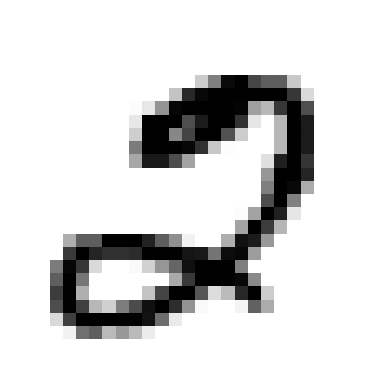

In [6]:
# Let's take peak at one example from the dataset
# Let's make function that plots the digit
import matplotlib.pyplot as plt
from numpy import random
# we are going to use imshow() function of matplotlib to display the image
# we use cmap="binary" to get a grayscale color map (0=white, 255=black)

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Let's plot the image
dig_ind = random.randint(70000)
digit = X[dig_ind]
plot_digit(digit)
plt.show()

In [7]:
# Before we do any preprocessing and inspection it is essential we split
# The data to ensure we don't mess around with the test data
# Let's split the data into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### $\color{red}{\text{Important Points}}$
* Scikit-Learn classifiers (e.g., LogisticRegression, RandomForestClassifier, and GaussianNB) are capable of handling multiple classes natively.
* Others are strictly binary classifiers (e.g., SGDClassifier and SVC)
* However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers
* one-versus-the-rest (OvR) strategy, or sometimes one-versus-all (OvA)
* One-versus-one (OvO) strategy
* Some algorithms (such as support vector machine classifiers) scale poorly with the size of the training set
* For these algorithms OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets. For most binary classification algorithms, however, OvR is preferred
* Scikit-Learn detects when you try to use a binary classification algorithm fora multiclass classification task, and it automatically runs OvR or OvO, depending on the algorithm

In [13]:
# Let's implement this using an SVC
from sklearn.svm import SVC

# Let's create an instant of svm classifer and train a model
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [60]:
# Let's predict 5 from the model

# Let's get all the digits where the digit is 5
index_5 = np.where(y_test == '5')[0]
digit = X_test[index_5[0]]
svm_clf.predict([digit])

array(['5'], dtype=object)

In [64]:
# A function that plots images
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

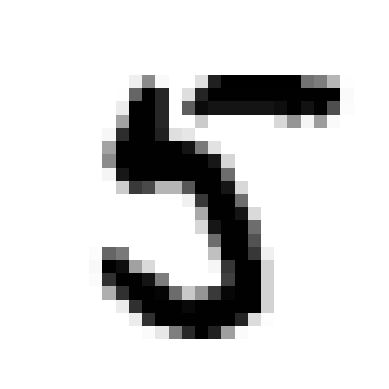

In [67]:
plot_digit(digit)

* We trained the SVC using the original target classes from 0 to 9 (y_train), instead of the 5-versus-the-rest target classes (y_train_5)
* Since there are 10 classes (i.e., more than 2), Scikit-Learn used the OvO strategy and trained 45 binary classifiers
* This code actually made 45 predictions—one per pair of classes—and it selected the class that won the most duels. If you call the decision_function() method, you will see that it returns 10 scores per instance: one per class
* Each class gets a score equal to the number of won duels plus or minus a small tweak (max ±0.33) to break ties, based on the classifier scores

In [69]:
# Let's see the scores
digit_scores = svm_clf.decision_function([digit])
digit_scores.round(2)

array([[ 4.83, -0.29,  5.76,  7.27,  2.74,  9.31,  1.73,  0.72,  8.3 ,
         3.77]])

* The highest score is 9.3, and it’s indeed the one corresponding to class 5 

In [70]:
class_id = digit_scores.argmax()
print(class_id)

5
